# Agrupación en clústeres

<img src="texto_1.png" style="widt: 260px; height:448px">

In [32]:
# Importamos las librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.4.2
numpy version: 1.21.5
seaborn version: 0.11.2


In [33]:
# Cargamos el dataset y motramos las primeras 5 filas:
mall_data = pd.read_csv('mall_customers.csv')
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
# Mostramos cuantas filas y columnas hay:
print('Hay {} filas y {} columnas en nuestro dataset.'.format(mall_data.shape[0],mall_data.shape[1]))

Hay 200 filas y 5 columnas en nuestro dataset.


In [35]:
# Info:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [36]:
# Veremos una estadística descriptiva para ver si están bien los valores
# minimos y máximos
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [37]:
# Veremos si hay valores nulos:
mall_data.isnull().sum().sort_values(ascending = False)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

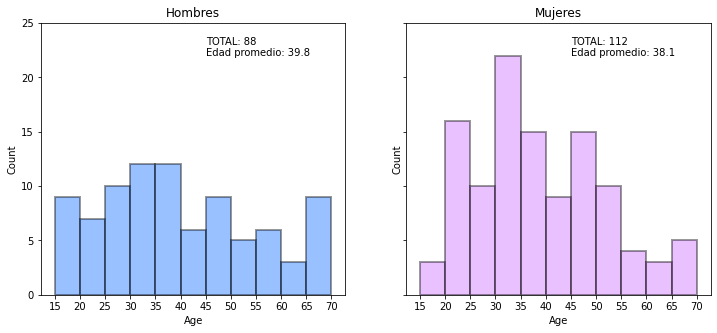

In [38]:
# Analisis exploratorio de los datos
# Investigaremos la distribución de una varible numérica.
# La data será estratificada por género- la única variable
# categórica.

males_age = mall_data[mall_data['Gender']=='Male']['Age'] # Subconjunto de hombres por edad
females_age = mall_data[mall_data['Gender']=='Female']['Age'] # Subconjunto de mujeres por edad

age_bins = range(15,75,5)

# Histograma de Hombres
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5), sharey = True)
sns.distplot(males_age, bins = age_bins, kde = False, color = '#0066ff', ax = ax1, hist_kws = dict(edgecolor = "k", linewidth = 2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top = 25)
ax1.set_title('Hombres')
ax1.set_ylabel('Count')
ax1.text(45, 23, "TOTAL: {}".format(males_age.count()))
ax1.text(45, 22, "Edad promedio: {:.1f}".format(males_age.mean()))

# Histograma de Mujeres
sns.distplot(females_age, bins = age_bins, kde = False, color = '#cc66ff', ax = ax2, hist_kws = dict(edgecolor = "k", linewidth = 2))
ax2.set_xticks(age_bins)
ax2.set_ylim(top = 25)
ax2.set_title('Mujeres')
ax2.set_ylabel('Count')
ax2.text(45, 23, "TOTAL: {}".format(females_age.count()))
ax2.text(45, 22, "Edad promedio: {:.1f}".format(females_age.mean()))

plt.show()

In [39]:
# P valor
print('Prueba de Kolgomorov-Smirnov, p-value: {:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

Prueba de Kolgomorov-Smirnov, p-value: 0.49


### La edad promedio de los clientes hombres es más estable que la de las mujeres (39.8 vs 38.1). La distribución de la edad de los hombres es más uniforme que el de las mujeres. Podemos observar que el grupo de edad más grande se encuentra entre 30 y 35 años. La prueba de Kolgomorov_smirnov muestra que hay diferencia entre estos grupos y que no hay significancia estadística entre ellas.

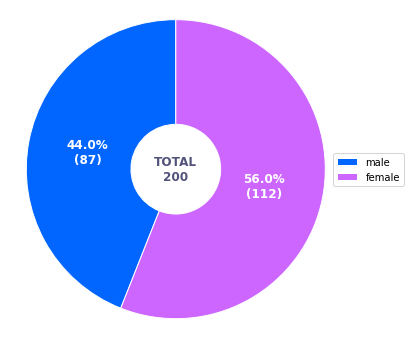

In [40]:
def labeler(pct,allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(), females_age.count()] #wedge sizes

fig0, ax1 = plt.subplots(figsize = (6,6))
wedges, texts, autotexts = ax1.pie(sizes,
                                   autopct = lambda pct: labeler(pct, sizes),
                                   radius = 1,
                                   colors = ['#0066ff','#cc66ff'],
                                   startangle = 90,
                                   textprops = dict(color = "w"),
                                   wedgeprops = dict(width = 0.7, edgecolor = 'w'))

ax1.legend(wedges, ['male','female'],
          loc = 'center right',
          bbox_to_anchor = (0.7,0,0.5,1))

plt.text(0,0,'TOTAL\n{}'.format(mall_data['Age'].count()),
        weight = 'bold', size = 12, color = '#52527a',
        ha = 'center', va = 'center')

plt.setp(autotexts, size = 12, weight = 'bold')
ax1.axis('equal') # Equal aspect ratio
plt.show()

### Se concluye que hay más mujeres que hombres

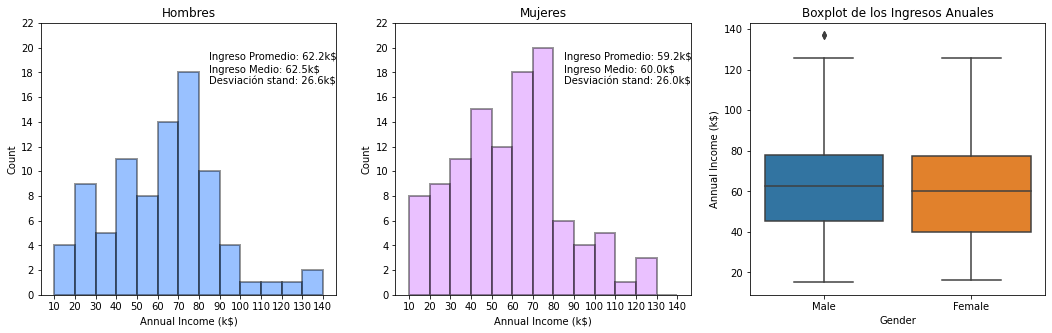

In [41]:
males_income = mall_data[mall_data['Gender']=='Male']['Annual Income (k$)'] # Subset with males income
females_income = mall_data[mall_data['Gender']=='Female']['Annual Income (k$)'] # Subset with females income

my_bins = range(10,150,10)

# Histograma de Hombres
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,5))
sns.distplot(males_income, bins = my_bins, kde = False, color = '#0066ff', ax = ax1, hist_kws = dict(edgecolor = "k", linewidth = 2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Hombres')
ax1.set_ylabel('Count')
ax1.text(85, 19, "Ingreso Promedio: {:.1f}k$".format(males_income.mean()))
ax1.text(85, 18, "Ingreso Medio: {:.1f}k$".format(males_income.median()))
ax1.text(85, 17, "Desviación stand: {:.1f}k$".format(males_income.std()))

# Histograma de Mujeres
sns.distplot(females_income, bins = my_bins, kde = False, color = '#cc66ff', ax = ax2, hist_kws = dict(edgecolor = "k", linewidth = 2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Mujeres')
ax2.set_ylabel('Count')
ax2.text(85, 19, "Ingreso Promedio: {:.1f}k$".format(females_income.mean()))
ax2.text(85, 18, "Ingreso Medio: {:.1f}k$".format(females_income.median()))
ax2.text(85, 17, "Desviación stand: {:.1f}k$".format(females_income.std()))

#boxplot
sns.boxplot(x = 'Gender', y = 'Annual Income (k$)', data = mall_data, ax = ax3)
ax3.set_title('Boxplot de los Ingresos Anuales')
plt.show()

In [42]:
# P valor
print('Prueba de Kolgomorov-Smirnov, p-value: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))

Prueba de Kolgomorov-Smirnov, p-value: 0.78


### El ingreso promedio anual es mayor en hombres que en mujeres (62.2 vs 59.2), también lo es el ingreso medio (62.5 vs 60.0) y levemente la desviación estándar (26.6 vs 26.0). Por otro lado la dispersión dentro de los cuartiles es muy parecida. Gracias a la prueba K-s podemos afirmar que estos grupos no son estadísticamente distintos. NOTA: existe un outlier en el sueldo de los hombres de 130k a 140k.

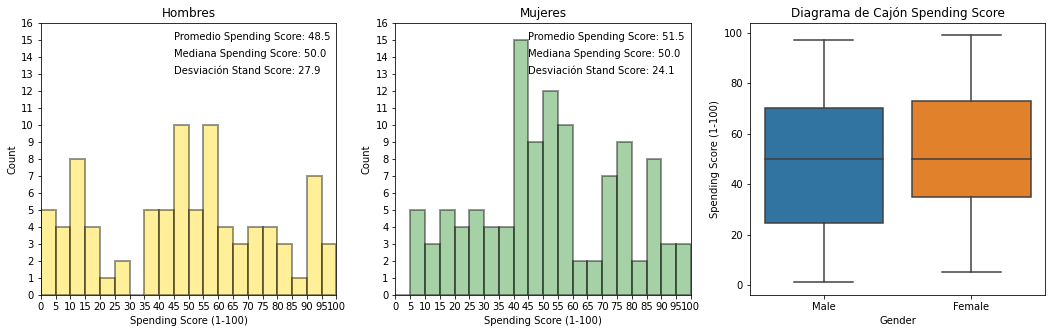

In [43]:
males_spending = mall_data[mall_data['Gender']=='Male']['Spending Score (1-100)'] # Subset with males age
females_spending = mall_data[mall_data['Gender']=='Female']['Spending Score (1-100)'] # Subset with females age

spending_bins = range(0,150,5)

# Histograma de Hombres
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,5))
sns.distplot(males_spending, bins = spending_bins, kde = False, color = 'gold', ax = ax1, hist_kws = dict(edgecolor = "k", linewidth = 2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Hombres')
ax1.set_ylabel('Count')
ax1.text(45, 15, "Promedio Spending Score: {:.1f}".format(males_spending.mean()))
ax1.text(45, 14, "Mediana Spending Score: {:.1f}".format(males_spending.median()))
ax1.text(45, 13, "Desviación Stand Score: {:.1f}".format(males_spending.std()))
  
# Histograma de Mujeres
sns.distplot(females_spending, bins = spending_bins, kde = False, color = 'forestgreen', ax = ax2, hist_kws = dict(edgecolor = "k", linewidth = 2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Mujeres')
ax2.set_ylabel('Count')
ax2.text(45, 15, "Promedio Spending Score: {:.1f}".format(females_spending.mean()))
ax2.text(45, 14, "Mediana Spending Score: {:.1f}".format(females_spending.median()))
ax2.text(45, 13, "Desviación Stand Score: {:.1f}".format(females_spending.std()))
  
#boxplot
sns.boxplot(x = 'Gender', y = 'Spending Score (1-100)', data = mall_data, ax = ax3)
ax3.set_title('Diagrama de Cajón Spending Score')
plt.show()

In [44]:
# P valor
print('Prueba de Kolgomorov-Smirnov, p-value: {:.2f}'.format(stats.ks_2samp(males_spending, females_spending)[1]))

Prueba de Kolgomorov-Smirnov, p-value: 0.29


### El gasto promedio es mayor en las mujeres (51.5 vs 48.5) y la mediana es exactamente igual, por lo que se infiere que la mitad de los hombres tiene un puntaje de gasto inferior a 50 y la otra mitad es superior a 50. Lo mismo sucede con las mujeres. Además la desviación estándar de los hombres es mayor, con un 27.9 vs un 24.1 de las mujeres, lo que significa que el rango de la puntuación de gasto de los hombres es más amplia que la de las mujeres. Por último, el 50% central de los hombres posee un puntaje entre 24 y 70 puntos aproximadamente, en cambio, el 50% central de las mujeres, posee un puntaje entre 34 y 74. El p-valor indica que no hay evidencia para indicar una real diferencia entre hombres y mujeres.

In [45]:
medians_by_age_group = mall_data.groupby(["Gender",pd.cut(mall_data['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender','Age_group'])
medians_by_age_group.reset_index(inplace = True)

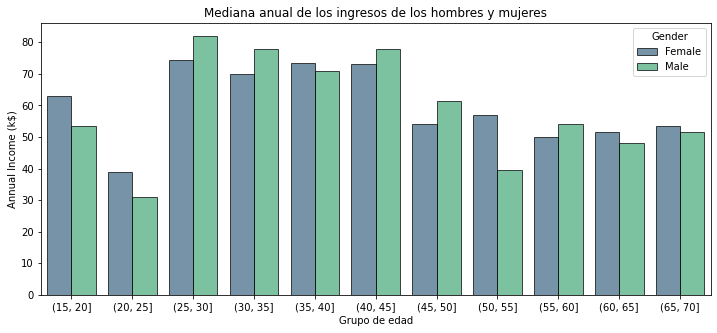

In [46]:
fig, ax = plt.subplots(figsize = (12,5))
sns.barplot(x = 'Age_group', y = 'Annual Income (k$)', hue = 'Gender', data = medians_by_age_group,
    palette = 'viridis',
    alpha = 0.7, edgecolor = 'k',
    ax = ax) 
ax.set_title('Mediana anual de los ingresos de los hombres y mujeres')
ax.set_xlabel('Grupo de edad')
plt.show()

### En este gráfico se puede observar que los clientes más adinerados tienen una edad entre los 25 y 45 años, tanto en el género femenino como masculino.

# 2.1 Correlación de Datos
## Coeficiente de Correlación de Pearson

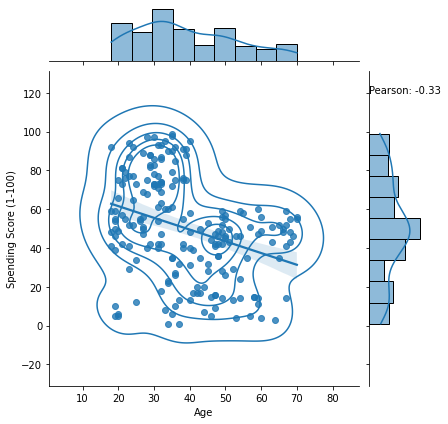

In [47]:
# Correlación entre edad y puntaje de gasto del cliente.

from scipy.stats import pearsonr

corr, _ = pearsonr(mall_data['Age'], mall_data['Spending Score (1-100)'])

jp = (sns.jointplot('Age','Spending Score (1-100)', data = mall_data,
                   kind = 'reg')).plot_joint(sns.kdeplot, zorder = 0, n_levels = 6)

plt.text(0,120, 'Pearson: {:.2f}'.format(corr))
plt.show()

### CONCLUSIÓN: La correlación es un poco baja entre edad y score por el 0,33 (El coeficiente de pearson es la pendiente de la recta)

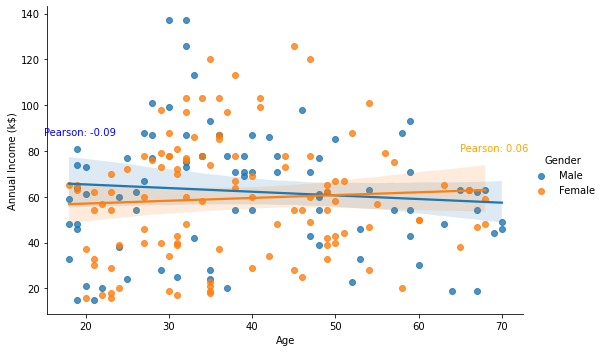

In [48]:
# Correlación entre edad y el ingreso anual:

corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot('Age','Annual Income (k$)', data = mall_data, hue = 'Gender', aspect = 1.5)

plt.text(15,87, 'Pearson: {:.2f}'.format(corr1),color = 'blue')
plt.text(65,80, 'Pearson: {:.2f}'.format(corr2),color = 'orange')

plt.show()

 ### CONCLUSIÓN: Se puede observar una correlación negativa casi constante entre la edad de los hombres y los ingresos del mismo. Por otra parte, entre la edad de las mujeres y su ingreso anual, se identifica un aumento, pero lento en el tiempo. El coeficiente de Pearson indica que no existe correlación entre edad e ingreso.

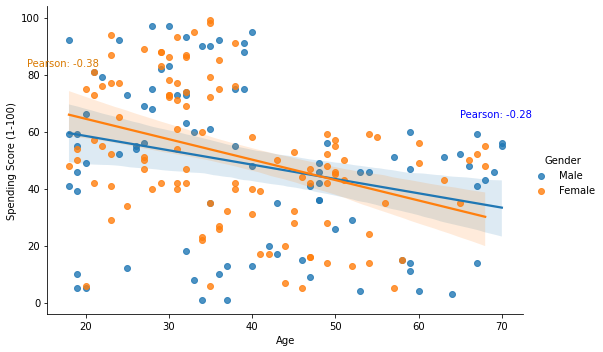

In [49]:
# Correlación entre edad y puntaje de gasto (nuevamente, no se porqué)

corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot('Age','Spending Score (1-100)', data = mall_data, hue = 'Gender', aspect = 1.5)

plt.text(65,65, 'Pearson: {:.2f}'.format(corr1),color = 'blue')
plt.text(13,83, 'Pearson: {:.2f}'.format(corr2),color = '#d97900')

plt.show()

### En ambos casos, hombre y mujer, la correlación indica negatividad, es decir, mientras la persona tiene más edad, su puntuación de gasto es inferior. Sin embargo, el coeficiente de Pearson no indica que exista una correlación.

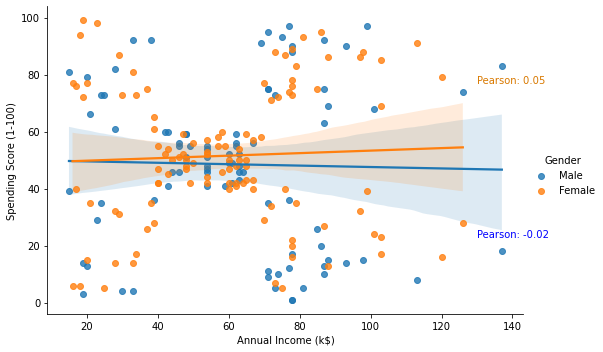

In [50]:
# Correlación entre ingreso y puntaje de gasto

corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot('Annual Income (k$)','Spending Score (1-100)', data = mall_data, hue = 'Gender', aspect = 1.5)

plt.text(130,23, 'Pearson: {:.2f}'.format(corr1),color = 'blue')
plt.text(130,77, 'Pearson: {:.2f}'.format(corr2),color = '#d97900')

plt.show()

# 3. Clustering

 <img src="texto_2.png" style="widt: 260px; height:448px">

<img src="texto_3.png" style="widt: 260px; height:228px">

<img src="texto_4.png">

<img src="texto_5.png">

# 3.1 Algoritmo

In [56]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score

In [57]:
no_of_clusters = []
preferences = range(-20000,-5000,100) #rango elegido arbitrariamente
af_sil_score = [] # puntuacion de silueta

for p in preferences:
    AF = AffinityPropagation(preference = p, max_iter = 200).fit(X_numerics)
    no_of_clusters.append((len(np.unique(AF.labels_))))
    #af_sil_score.append(silhouette_score(X_numerics, AF.labels_))

af_results = pd.DataFrame([preferences, no_of_clusters], index = ['preference','clusters']).T
af_results.sort_values(by = 'clusters', ascending = False).head() # Se muestran solo 5 puntuaciones en pantalla


NameError: name 'X_numerics' is not defined